# Adaline

Problem: Classifying 3-d points into 2 classes

In this problem we use the Adaline algorithm:

Adaline characteristics:
- One of the simplest neural networks
- One McCulloch-Pitts neuron, just like Perceptron
- Supervised
- Calculates the decision boundary between two classes, just like Perceptron
- Calculating the predicted class:
    - Activation function with weights W and bias w<sub>0</sub>
    \begin{equation}
    u = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + w_0
    \end{equation}
    - The output of the activation function u is the predicted target (linear output function)
    - If classes are -1 and 1, Adaline classifies a point to class -1 if u is less than 0, and to class 1 if u is larger than or equal to 0
    - If classes are 0 and 1, Adaline classifies a point to class 0 if u is less than 0, and to class 1 if u is larger than or equal to 0
   
Training:
- Initialize weights W to random values
- For each training point / example:
    - Calculate the activation value u
    - Adjust weights so as u approximates the y target as close as possible
    \begin{equation}
    w^k = w^{k-1} + β * (y - u) * x
    \end{equation}
    where β is the learning rate and k is the corresponding epoch
- The algorithm ends when the mean squared error (MSE) between true and predicted targets is smaller than a threshold ε
\begin{equation}
J_{mse} = \frac{1}{2} \sum_{p=1}^{P} (u^{(p)} - y^{(p)})^2
\end{equation}
\begin{equation}
J_{mse} < ε
\end{equation}
- Otherwise, the algorithm ends when a maximum number of epochs has been fulfilled.

------------------

Architecture:
- One McCulloch-Pitts neuron, just like Perceptron

Import the libraries we are going to use.

This time, we will be using mlxtend for modeling, since scikit-learn does not provide an algorithm for Adaline.

In [1]:
import numpy as np
from mlxtend.classifier import Adaline
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

The make_points function is the same used for Perceptron.

In [2]:
def make_points(low, high, dims, n, target):
    points = []
    for i in range(dims):
        points.append(np.random.uniform(low[i], high[i], n))
    points.append(np.ones(n) * target)
    
    return np.column_stack(points)

This time, for plotting the decision boundary, we create a new make_hyperplane method.

This method will prove useful, since we are dealing with 3 dimensions, and not 2.

In [3]:
def make_hyperplane(low, high, w, b):
    
    tmp = np.linspace(-0.1,1)
    x, y = np.meshgrid(tmp, tmp)
    z = -model.b_[0] - model.w_[0][0] * x - model.w_[1][0] * y / model.w_[2][0]
    
    return x, y, z

plot_training is similar to the one used for Perceptron.

The plots are the same, with one more plot displaying the evolution of the MSE over the epochs

Plots:
- Static plot with the points and their true classes; not updated
- Dynamic plot with the points and their predicted classes, as well as the moving decision boundary
- Dynamic plot with the points' class prediction
- Dynamic plot of the MSE

In [4]:
def plot_training(model, X_train, t_train):
    fig = plt.figure(figsize=(8, 12))
    fig.add_subplot(411, projection='3d')
    fig.add_subplot(412, projection='3d')
    fig.add_subplot(413)
    fig.add_subplot(414)

    axes = fig.get_axes()

    for ax in axes:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    axes[0].set_xlim(-0.1, 1)
    axes[0].set_ylim(-0.1, 1)
    axes[0].set_zlim(-0.1, 1)
    axes[1].set_xlim(-0.1, 1)
    axes[1].set_ylim(-0.1, 1)
    axes[1].set_zlim(-0.1, 1)
    axes[2].set_xlim(-0.2, 1.1)
    axes[2].set_ylim(-0.2, 1.1)

    n_iter = 100
    num_train_samples = len(X_train)
    
    # Plot 1 - static
    c0 = np.where(t_train == 0)
    c1 = np.where(t_train == 1)
    axes[0].scatter(X_train[c0,0], X_train[c0,1], X_train[c0,2], marker='o')
    axes[0].scatter(X_train[c1,0], X_train[c1,1], X_train[c1,2], marker='x')
    
    mse = {}
    for i in range(n_iter):
        for ax in axes[1:]:
            ax.clear()

        axes[0].set_title('Epoch ' + str(i) + ' out of ' + str(n_iter))
        model = model.fit(X_train, t_train, init_params=False)

        train_pred = model.predict(X_train)
        
        # Plot 2        
        c0 = np.where(train_pred == 0)
        c1 = np.where(train_pred == 1)
        axes[1].scatter(X_train[c0,0], X_train[c0,1], X_train[c0,2], marker='o')
        axes[1].scatter(X_train[c1,0], X_train[c1,1], X_train[c1,2], marker='x')
        # Decision boundary plot
        axes[1].plot_surface(*make_hyperplane(-0.1, 1, model.w_, model.b_))
        
        # Plot 3
        sns.scatterplot(x=range(num_train_samples), y=train_pred,
                        hue=train_pred, style=train_pred,
                        ax=axes[2])
        
        # Plot 4
        axes[3].set_title('Mean squared error')
        mse[i] = mean_squared_error(t_train, train_pred)
        axes[3].plot(mse.keys(), mse.values())
        
        fig.canvas.draw()
        plt.pause(0.1)
            
    return model

The problem is split into 4 parts:
1. Linearly separable data
2. Non-linearly separable data

The procedure is the same as the Perceptron notebook

## Linearly separable data

Define a number of points

In [5]:
n = 400

Create the points of each class with the make_points method

In [6]:
lin_separable = np.row_stack((make_points([0, 0, 0], [0.3, 0.3, 0.4], 3, n//2, 0),
                              make_points([0.7, 0.7, 0.7], [0.9, 0.9, 0.9], 3, n//2, 1)))

Split into training and test set

In [7]:
X_train, X_test, t_train, t_test = train_test_split(lin_separable[:,:3], lin_separable[:,3], 
                                                    stratify=lin_separable[:,3])

Sort the points based on their class. This helps to better visualize the third plot

In [8]:
X_train = X_train[t_train.argsort()]
t_train.sort()
t_train = t_train.astype('int')
X_test = X_test[t_test.argsort()]
t_test.sort()
t_test = t_test.astype('int')

Create the model

In [9]:
model = Adaline(epochs=1)

Train the model with plot_training, displaying in the meantime the plots at each epoch

<IPython.core.display.Javascript object>


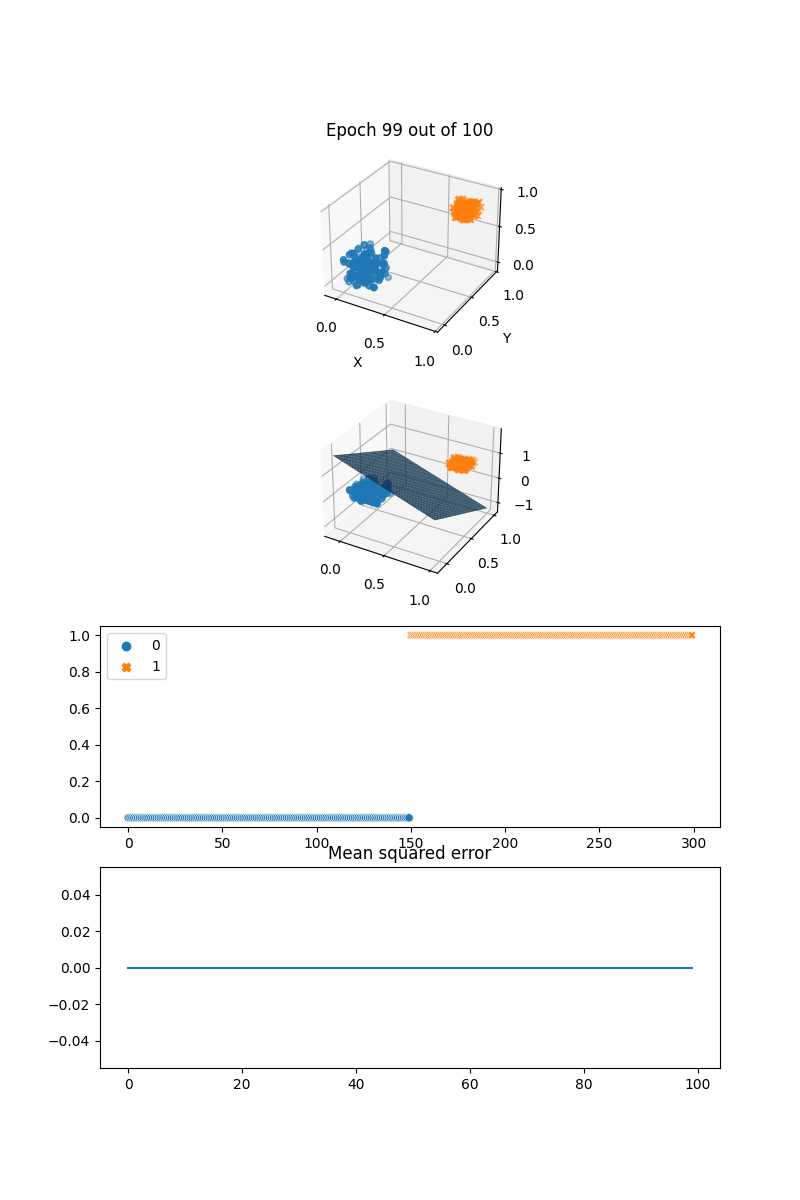

In [10]:
%matplotlib notebook
model = plot_training(model, X_train, t_train)

At the end, we test the model on test data and measure how well they are classified with yet another plot

In [11]:
num_test_samples = len(X_test)

In [12]:
test_pred = model.predict(X_test)

<IPython.core.display.Javascript object>


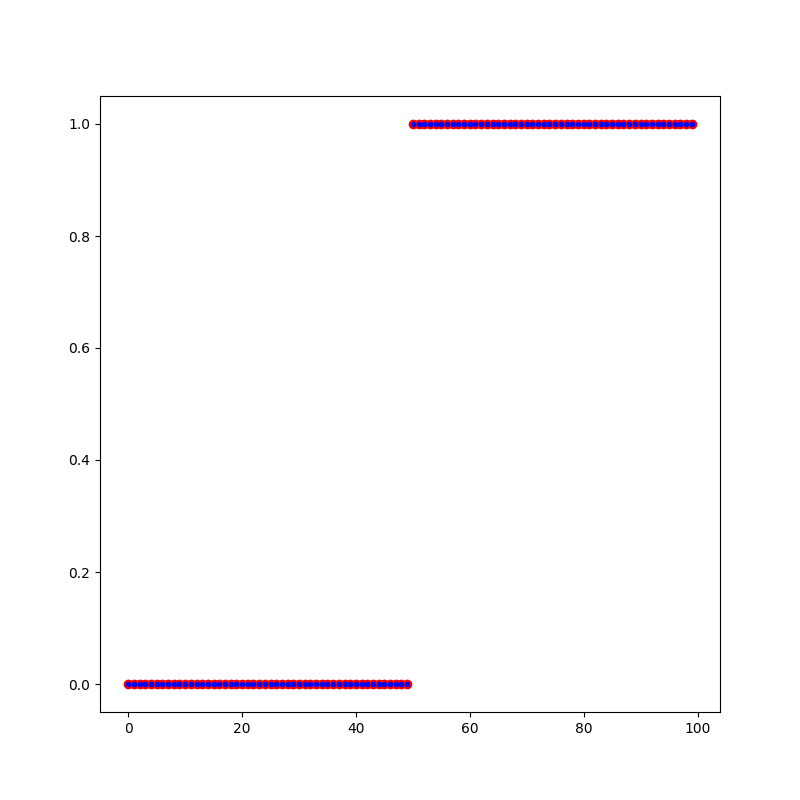

In [13]:
# %matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(range(num_test_samples), test_pred, c='r', marker='o')
plt.scatter(range(num_test_samples), t_test, c='b', marker='.')

plt.show()

We follow the same procedure for non-linearly separable data

## Linearly inseparable data

In [14]:
n = 400

In [11]:
non_separable = np.row_stack((make_points([0, 0, 0], [0.3, 0.3, 0.3], 3, n//4, 0),
                               make_points([0.7, 0.7, 0.7], [0.9, 0.9, 0.9], 3, n//4, 0),
                               make_points([0.7, 0.7, 0], [0.9, 0.9, 0.3], 3, n//4, 1),
                               make_points([0, 0, 0.7], [0.3, 0.3, 0.9], 3, n//4, 1)))

In [12]:
X_train, X_test, t_train, t_test = train_test_split(non_separable[:,:3], non_separable[:,3], 
                                                    stratify=non_separable[:,3])

In [13]:
X_train = X_train[t_train.argsort()]
t_train.sort()
t_train = t_train.astype('int')
X_test = X_test[t_test.argsort()]
t_test.sort()
t_test = t_test.astype('int')

In [14]:
model = Adaline(epochs=1)

<IPython.core.display.Javascript object>


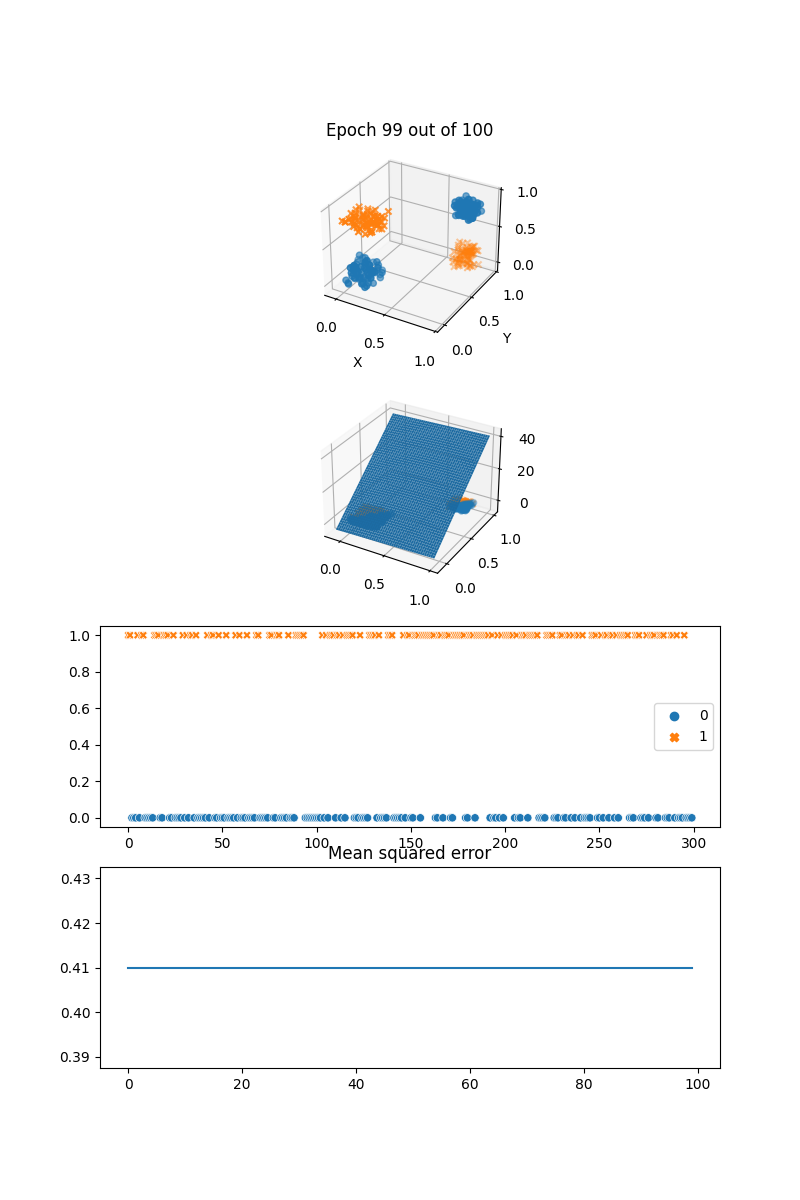

In [15]:
%matplotlib notebook
model = plot_training(model, X_train, t_train)

In [20]:
num_test_samples = len(X_test)

In [21]:
test_pred = model.predict(X_test)

<IPython.core.display.Javascript object>


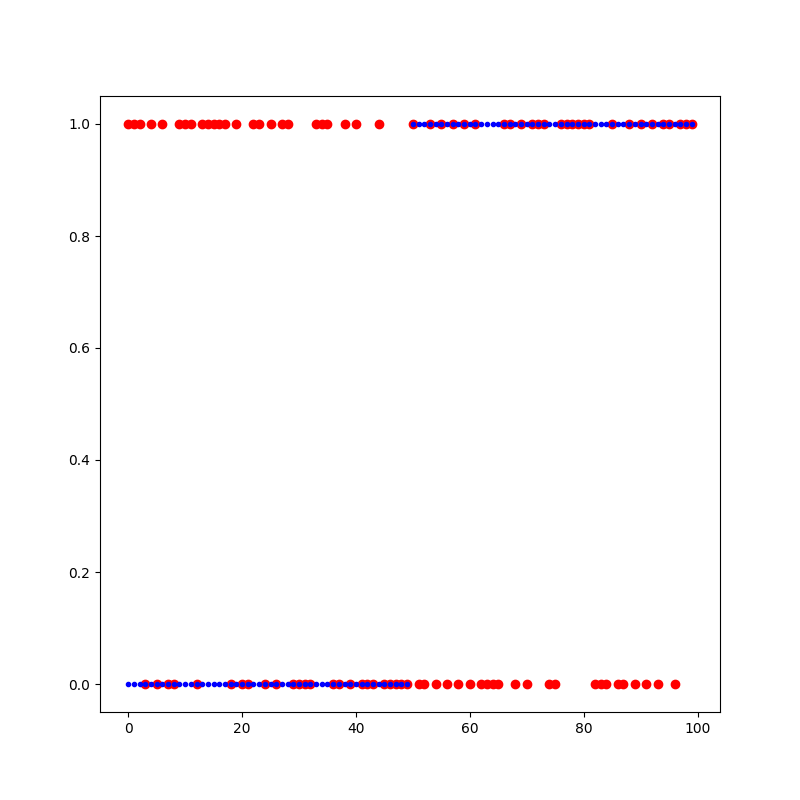

In [22]:
# %matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(range(num_test_samples), test_pred, c='r', marker='o')
plt.scatter(range(num_test_samples), t_test, c='b', marker='.')

plt.show()